# Customer Segmentation
This segmentation model is built based on survey data from 100 Emporium customers *(we are using this small figure for ease of understanding the analysis. While this is a small absolute figure, we infer in this analysis that this is a sample size representative of the entire customer base)*. Emporium, here, represents a department store in the US. This data is fictitious but mimicks actual data from experience in the retail industry. The data contains information about customers' biodata, and their interactions with Emporium and its competitors over three months.

## Table of Contents
1. [Data Wrangling](#data-wrangling)
    * [Modules and Clients](#modules-and-clients)
    * [Data Loading](#data-loading)
    * [Data Inspection](#data-inspection)
    * [Data Transformation](#data-transformation)
2. [Segmentation Model](#segmentation-model)
    * [User Defined Functions](#user-defined-functions)
    * [Behavioural Segmentation](#behavioural-segmentation)
        * [Behavioural Features Engineering](#behavioural-features-engineering)
        * [Behavioural Segments](#behavioural-segments)
    * [Competitor Landscape / Loyalty Segmentation](#competitor-landscape--loyalty-segmentation)
        * [Competitor Landscape Features Engineering](#competitor-landscape-features-engineering)
        * [Competitor Landscape / Loyalty Segments](#competitor-landscape--loyalty-segments)
    * [Product Preference Segmentation](#product-preference-segmentation)
        * [Product Features Engineering](#product-features-engineering)
        * [Product Segments](#product-segments)
    * [Channel Preference Segmentation](#channel-preference-segmentation)
        * [Channel Features Engineering](#channel-features-engineering)
        * [Channel Segments](#channel-segments)

## Data Wrangling
The data is loaded, inspected, cleaned, and transformed for the model

### Modules and Clients

In [1]:
# import relevant modules and ignore warnings
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from kmodes.kmodes import KModes
import seaborn as sns
import pandas as pd
import numpy as np

### Data Loading

In [2]:
# load data into a pandas dataframe
customers_df = pd.read_csv('emporium_segmentation_data.csv')

### Data Inspection

In [3]:
# inspect five rows
customers_df.sample(5)

,customer_id,customer_name,gender,age,annual_household_income,who_you_usually_shop_for,how_often_you_shopped_groceries_in_the_past_three_mnths,how_often_you_shopped_clothing_shoes_accessories_in_the_past_three_mnths,how_often_you_shopped_home_furniture_appliances_in_the_past_three_mnths,how_often_you_shopped_health_wellness_beauty_in_the_past_three_mnths,...,where_else_do_you_shop_walgreens,where_else_do_you_shop_amazon_go,where_else_do_you_shop_lowe's,where_else_do_you_shop_kroger,where_else_do_you_shop_costco,where_else_do_you_shop_kohl's,where_else_do_you_shop_best_buy,where_else_do_you_shop_macy's,where_else_do_you_shop_albertsons,how_much_do_you_spend_on_each_trip_to_competitors
61,40587988,Michael Lee,Male,23,113849,"My spouse, kids and I",Every two weeks,Monthly,Once or twice,Once or twice,...,NaN,NaN,NaN,NaN,Costco,NaN,Best Buy,NaN,NaN,61
60,98753260,Robert Brown,Male,50,75666,"My spouse, kids and I",Every two weeks,Once or twice,Once or twice,Once or twice,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Albertsons,66
95,52339391,Emma Thompson,Female,34,106599,"My spouse, kids and I",More than once per week,Every two weeks,Monthly,Monthly,...,NaN,NaN,NaN,NaN,NaN,Kohl's,NaN,Macy's,Albertsons,71
0,95822412,Andrew Davis,Male,35,156018,Myself,Weekly,Monthly,Never,Never,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,154
53,94374605,David Johnson,Male,26,116636,My spouse and I,More than once per week,Every two weeks,Monthly,Monthly,...,NaN,NaN,NaN,NaN,Costco,NaN,Best Buy,NaN,NaN,19


In [4]:
# summary
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 41 columns):
 #   Column                                                                    Non-Null Count  Dtype 
---  ------                                                                    --------------  ----- 
 0   customer_id                                                               100 non-null    int64 
 1   customer_name                                                             100 non-null    object
 2   gender                                                                    100 non-null    object
 3   age                                                                       100 non-null    int64 
 4   annual_household_income                                                   100 non-null    int64 
 5   who_you_usually_shop_for                                                  100 non-null    object
 6   how_often_you_shopped_groceries_in_the_past_three_mnths                   1

In [5]:
# check for duplicate customers
customers_df.customer_id.duplicated().sum()

0

In [6]:
# summary stats for numeric columns
customers_df.describe()

,customer_id,age,annual_household_income,how_much_do_you_spend_on_each_emporium_trip,how_much_do_you_spend_on_each_trip_to_competitors
count,1.000000e+02,100.000000,100.000000,100.000000,100.000000
mean,5.217406e+07,39.610000,103138.860000,62.880000,59.190000
std,2.640957e+07,9.385025,35227.604454,26.259882,31.872123
min,1.087225e+07,18.000000,39757.000000,9.000000,7.000000
25%,3.128886e+07,33.750000,77953.500000,44.000000,40.000000
50%,4.730212e+07,39.000000,98065.000000,63.000000,55.500000
75%,7.175810e+07,47.250000,124241.250000,79.250000,74.750000
max,9.994939e+07,65.000000,200242.000000,130.000000,155.000000


In [7]:
# summary stats for text columns
customers_df.describe(include=['O'])

,customer_name,gender,who_you_usually_shop_for,how_often_you_shopped_groceries_in_the_past_three_mnths,how_often_you_shopped_clothing_shoes_accessories_in_the_past_three_mnths,how_often_you_shopped_home_furniture_appliances_in_the_past_three_mnths,how_often_you_shopped_health_wellness_beauty_in_the_past_three_mnths,you_prefer_shopping_groceries_instore,you_prefer_shopping_groceries_website,you_prefer_shopping_groceries_with_the_app,...,where_else_do_you_shop_home_depot,where_else_do_you_shop_walgreens,where_else_do_you_shop_amazon_go,where_else_do_you_shop_lowe's,where_else_do_you_shop_kroger,where_else_do_you_shop_costco,where_else_do_you_shop_kohl's,where_else_do_you_shop_best_buy,where_else_do_you_shop_macy's,where_else_do_you_shop_albertsons
count,100,100,100,100,100,100,100,77,28,28,...,23,6,2,2,10,10,22,43,10,10
unique,96,2,5,5,6,4,5,1,1,1,...,1,1,1,1,1,1,1,1,1,1
top,Matthew Thomas,Male,"My spouse, kids and I",Weekly,Once or twice,Once or twice,Once or twice,In-Store,Online,App,...,Home Depot,Walgreens,Amazon Go,Lowe's,Kroger,Costco,Kohl's,Best Buy,Macy's,Albertsons
freq,2,51,46,36,41,43,52,77,28,28,...,23,6,2,2,10,10,22,43,10,10


### Data Transformation

#### Converting ids from integers to strings and setting as index

In [8]:
# change id datatype to string
customers_df.customer_id = customers_df.customer_id.astype(str)

In [9]:
# make id the dataframe index
customers_df.set_index('customer_id', inplace=True)

#### Creating categorical ages

In [10]:
# set column to a variable
age_column = customers_df.age

In [11]:
# check age distribution
age_column.describe()

count    100.000000
mean      39.610000
std        9.385025
min       18.000000
25%       33.750000
50%       39.000000
75%       47.250000
max       65.000000
Name: age, dtype: float64

In [12]:
# group ages into categories
age_conditions = [age_column < 25, (age_column >= 25) & (age_column < 35), (age_column >= 35)
                  & (age_column < 45), (age_column >= 45) & (age_column < 55), (age_column >= 55)]
age_groups = ['Under 25', '25 to 34', '35 to 44', '45 to 54', '55 and above']
new_age_column = np.select(age_conditions, age_groups)
customers_df.loc[:, 'age_category'] = pd.Categorical(new_age_column, categories=age_groups, ordered=True)

#### Creating categorical income ranges

In [13]:
# set column to a variable
income_column = customers_df.annual_household_income

In [14]:
# check income distribution
income_column.describe()

count       100.000000
mean     103138.860000
std       35227.604454
min       39757.000000
25%       77953.500000
50%       98065.000000
75%      124241.250000
max      200242.000000
Name: annual_household_income, dtype: float64

In [15]:
# group income ranges into categories
income_conditions = [income_column < 50000, (income_column >= 50000) & (income_column < 75000), 
                     (income_column >= 75000) & (income_column < 100000), (income_column >= 100000) & 
                     (income_column < 125000), (income_column >= 125000) & (income_column < 150000),
                     income_column >= 150000]
income_groups = ['Under $50,000', '$50,000 to $74,999', '$75,000 to $99,999', '$100,000 to $124,999',
                 '$125,000 to $149,999', '$150,000 and above']
new_income_column = np.select(income_conditions, income_groups)
customers_df.loc[:, 'income_category'] = pd.Categorical(new_income_column, categories=income_groups, ordered=True)

#### Creating numeric frequency of visits

In [16]:
# calculate how often customers have visited Walmart in the past three months
frequency_columns = [col for col in customers_df.columns if 'how_often' in col]
frequency_groups = ['Never', 'Once or twice', 'Monthly', 'Every two weeks', 'Weekly', 'More than once per week']
num_freq_groups = {'Never':0, 'Once or twice':2, 'Monthly':3, 'Every two weeks':6, 'Weekly':12,
                   'More than once per week':36}
for column in frequency_columns:
    customers_df[column] = pd.Categorical(customers_df[column], categories=frequency_groups, ordered=True)
    customers_df[f'numeric_{column}'] = customers_df[column].replace(num_freq_groups).astype(int)
customers_df['highest_frequency'] = customers_df[frequency_columns].max(axis=1)
# change highest frequency to numeric
customers_df.highest_frequency = customers_df.highest_frequency.replace(num_freq_groups).astype(int)

#### Creating app conversion column

In [17]:
# create an empty column for app conversion
customers_df.loc[:, 'app_conversion'] = None
# set value to not used for those who have not used the app
customers_df.loc[(customers_df['you_have_used_the_emporium_app_to_shop'] == 'No'), 'app_conversion'] = 'Not used'
# set value to converted if a customer prefers to use the app for any product category
customers_df.loc[(customers_df['you_have_used_the_emporium_app_to_shop'] == 'Yes') &
                  ((customers_df['you_prefer_shopping_clothing_shoes_accessories_with_the_app'] == 'App') |
                  (customers_df['you_prefer_shopping_groceries_with_the_app'] == 'App') | 
                  (customers_df['you_prefer_shopping_health_wellness_beauty_with_the_app'] == 'App') |
                  (customers_df['you_prefer_shopping_home_furniture_appliances_with_the_app'] == 'App')), 
                  'app_conversion'] = 'Converted'
# else set value to churned
customers_df.loc[customers_df['app_conversion'].isna(), 'app_conversion'] = 'Churned'

#### Creating categorical Emporium spend ranges

In [18]:
# store column in a variable
emporium_spend_column = customers_df.how_much_do_you_spend_on_each_emporium_trip

In [19]:
# check spend distribution
emporium_spend_column.describe()

count    100.000000
mean      62.880000
std       26.259882
min        9.000000
25%       44.000000
50%       63.000000
75%       79.250000
max      130.000000
Name: how_much_do_you_spend_on_each_emporium_trip, dtype: float64

In [20]:
# group emporium_spend ranges into categories
emporium_spend_conditions = [emporium_spend_column < 30, (emporium_spend_column >= 30) & (emporium_spend_column < 50), 
                            (emporium_spend_column >= 50) & (emporium_spend_column < 100), emporium_spend_column >= 100]
emporium_spend_groups = ['Under $30', '$30 to $49', '$50 to $99', '$100 and above']
new_emporium_spend_column = np.select(emporium_spend_conditions, emporium_spend_groups)
customers_df.loc[:, 'emporium_spend_category'] = pd.Categorical(new_emporium_spend_column,
                                                                categories=emporium_spend_groups, ordered=True)

#### Count number of competitors each customer visits

In [21]:
# list all columns for competitors
competitor_cols = [column for column in customers_df.columns if 'where_else_do_you_shop' in column]

In [22]:
# count competitors
customers_df.loc[:,'number_of_competitors'] = customers_df[competitor_cols].count(axis=1)

#### Creating categorical competitor spend ranges

In [23]:
# store column in a variable
competitor_spend_column = customers_df.how_much_do_you_spend_on_each_trip_to_competitors

In [24]:
# check spend distribution
competitor_spend_column.describe()

count    100.000000
mean      59.190000
std       31.872123
min        7.000000
25%       40.000000
50%       55.500000
75%       74.750000
max      155.000000
Name: how_much_do_you_spend_on_each_trip_to_competitors, dtype: float64

In [25]:
# group competitor_spend ranges into categories
competitor_spend_conditions = [competitor_spend_column < 30, (competitor_spend_column >= 30) & 
                               (competitor_spend_column < 50), (competitor_spend_column >= 50) & 
                               (competitor_spend_column < 100), (competitor_spend_column >= 100) & 
                               (competitor_spend_column < 150), competitor_spend_column >= 150]
competitor_spend_groups = ['Under $30', '$30 to $49', '$50 to $99', '$100 to $149', '$150 and above']
new_competitor_spend_column = np.select(competitor_spend_conditions, competitor_spend_groups)
customers_df.loc[:, 'competitor_spend_category'] = pd.Categorical(new_competitor_spend_column,
                                                                  categories=competitor_spend_groups, ordered=True)

#### Creating categorical item prices

In [26]:
# set column to a variable
item_prices = customers_df.price_of_items_you_buy_on_each_emporium_trip

In [27]:
# group into categories
price_group = ['All discounted', 'Mostly discounted, some full price', 'Mostly full price, some discounted',
               'All full price']
customers_df.price_of_items_you_buy_on_each_emporium_trip = pd.Categorical(item_prices, categories=price_group,
                                                                           ordered=True)

#### Determining the number of financial services used by each customer

In [28]:
# count number of financial services used
cashback_cols = [col for col in customers_df.columns if 'do_you_use' in col]
customers_df.loc[:, 'number_of_money_services_used'] = customers_df.loc[:, cashback_cols].fillna('')\
    .map(lambda x:1 if x != '' else 0).sum(axis=1)

### Save wrangling results

In [29]:
# save cleaned data
customers_df.to_csv('cleaned_emporium_segmentation_data.csv')

## Segmentation Model
The customer segments are created based on purchasing behaviours, brand loyalty to Emporium, preferred product categories, and preferred shopping channels.

### User Defined Functions

#### Skewness validation

In [30]:
# check for skewness and perform log/cubic/sqaure root transformation if the data is skewed
def skewness_validation(features_df):
    # for each column
    for column_name in features_df:
        # store column in a variable
        column = features_df[column_name]
        # calculate skewness
        skew = column.skew()
        print(f'{column_name}:\nSkewness={skew}\n')
        # if skewed
        if (skew < -1) or (skew > 1):
            # perform log, cubic, and square root transformations
            transform_cols = {'log':np.log(column), 'cubic':np.cbrt(column), 'sqrt':np.sqrt(column)}
            transform_skew = {'log':abs(np.log(column).skew()), 'cubic':abs(np.cbrt(column).skew()),
                              'sqrt':abs(np.sqrt(column).skew())}
            # find the transformation with best skewness value
            minimum_value = min(value for value in transform_skew.values() if value != float("-inf") 
                                and not np.isnan(value))
            best_transform = [key for key in transform_skew if transform_skew[key] == minimum_value][0]
            # transform the column using the best transformation
            features_df[column_name] = transform_cols[best_transform]
            print(f'{best_transform.title()} transformation performed on {column_name}')
            print(f'New skewness value is {features_df[column_name].skew()}\n')

#### KMeans Function

In [31]:
# create a function to standardize columns and plot residual errors for one cluster to ten clusters
def kmeans(df_features, min_range=1, max_range=11):
    # initialize standard scaler
    scaler = StandardScaler()
    # standardise the dataframe
    scaler.fit(df_features)
    df_normalized = scaler.transform(df_features)
    df_normalized = pd.DataFrame(df_normalized, index=df_features.index, columns=df_features.columns)
    # create a list of sum osf squared errors (sse)
    sse= []
    # for the specified range, find sse of the kmeans clustering algorithm
    for k in range(min_range,max_range):
        kmeans= KMeans(n_clusters=k,n_init= 10,max_iter=300,tol=0.0001,random_state=42)
        a= kmeans.fit(df_normalized)
        sse.append(a.inertia_)
    # plot the graph of sses
    plt.plot(range(min_range,max_range),sse,'-');
    plt.plot(range(min_range,max_range),sse,'o');
    return df_normalized

In [32]:
def kmeans_cust_seg(df_raw, df_norm, n_clusters, figsize=[16,6]):
    # create a figure
    plt.figure(figsize=figsize)
    # perform kmeans algorithm on selected number of clusters
    kmeans = KMeans(n_clusters, random_state=42, n_init=10)
    kmeans.fit(df_norm)
    cluster_labels = kmeans.labels_
    df_norm = df_norm.assign(Segment = cluster_labels)
    # melt dataframe for avg feature value per segment
    df_melt = pd.melt(df_norm, id_vars='Segment', var_name='Attribute', value_name='Value')
    # plot feature values per segment
    plt.subplot(2, 1, 1)
    sns.lineplot(x='Attribute', y='Value', hue='Segment', data=df_melt, linewidth=2.0)
    # calculate feature relative importance
    pop_avg = df_raw.mean()
    df_raw = df_raw.assign(Segment = cluster_labels)
    cluster_avg = df_raw.groupby('Segment').mean()
    relative_imp = cluster_avg/pop_avg - 1
    # plot relative importance
    plt.subplot(2, 1, 2)
    sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn')
    return df_raw, df_norm, relative_imp

#### KModes Function

In [33]:
def kmodes(df, min_range=1, max_range=11):
    # create list for sses
    sse=[]
    # for specified range, run Kmodes algorithm
    for k in range(min_range,max_range):
        kmodes= KModes(n_clusters=k,init='Huang', n_init=10, random_state=42)
        clusters= kmodes.fit(df)
        sse.append(clusters.cost_)
    # plot sses
    plt.plot(range(min_range,max_range),sse,'-');
    plt.plot(range(min_range,max_range),sse,'o');

In [34]:
def kmodes_cust_seg(df, n_clusters):
    # kmodes algorithm for specified number of clusters
    kmodes= KModes(n_clusters=n_clusters, init='Huang', n_init=10, random_state=42)
    kmodes.fit(df)
    labels = kmodes.predict(df)
    results = pd.DataFrame({'Segment': labels}, index=df.index)
    # join results with original dataframe
    df = pd.concat([results, df], axis=1)
    return df

### Behavioural Segmentation
This segmentation is based on the customers' purchasing behaviour.

#### Behavioural Features Engineering
The data used include frequency of customers' visits, household income, and how much they spend on average in Walmart.

In [35]:
# select the frequency, income, and emporium spend columns
behaviour_seg_df = customers_df.loc[:, ['highest_frequency','annual_household_income',
                                        'how_much_do_you_spend_on_each_emporium_trip',
                                        'number_of_money_services_used']]
# numerically code the price of items
behaviour_seg_df.loc[:, 'price_of_items_you_buy_on_each_emporium_trip'] = \
    customers_df.price_of_items_you_buy_on_each_emporium_trip.cat.codes
# create a copy of the dataframe for the model
features_df = behaviour_seg_df.copy()

In [36]:
# check for skewness and perform log/cubic/square root transformation if the data is skewed
skewness_validation(features_df=features_df)

highest_frequency:
Skewness=0.9426467010973026

annual_household_income:
Skewness=0.5521502905238612

how_much_do_you_spend_on_each_emporium_trip:
Skewness=0.1769879840523104

number_of_money_services_used:
Skewness=0.5499182583161654

price_of_items_you_buy_on_each_emporium_trip:
Skewness=-0.446025228883908



#### Behavioural Segments

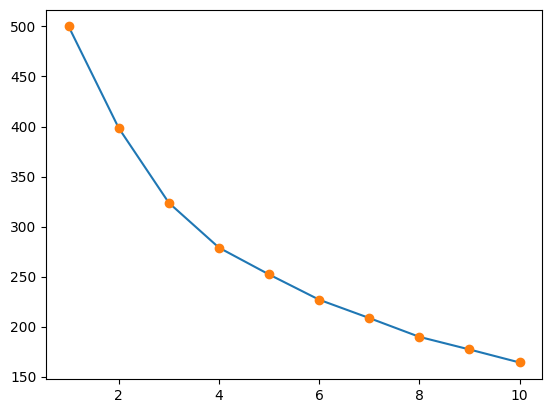

In [37]:
# use elbow spree to check sse
normalized_df = kmeans(df_features=features_df)

In [38]:
# summary stats
normalized_df.describe().round(2)

,highest_frequency,annual_household_income,how_much_do_you_spend_on_each_emporium_trip,number_of_money_services_used,price_of_items_you_buy_on_each_emporium_trip
count,100.00,100.00,100.00,100.00,100.00
mean,-0.00,-0.00,-0.00,-0.00,0.00
std,1.01,1.01,1.01,1.01,1.01
min,-1.00,-1.81,-2.06,-1.24,-2.12
25%,-0.68,-0.72,-0.72,-1.24,-1.03
50%,-0.20,-0.14,0.00,-0.05,0.05
75%,-0.20,0.60,0.63,0.25,1.14
max,1.70,2.77,2.57,2.35,1.14


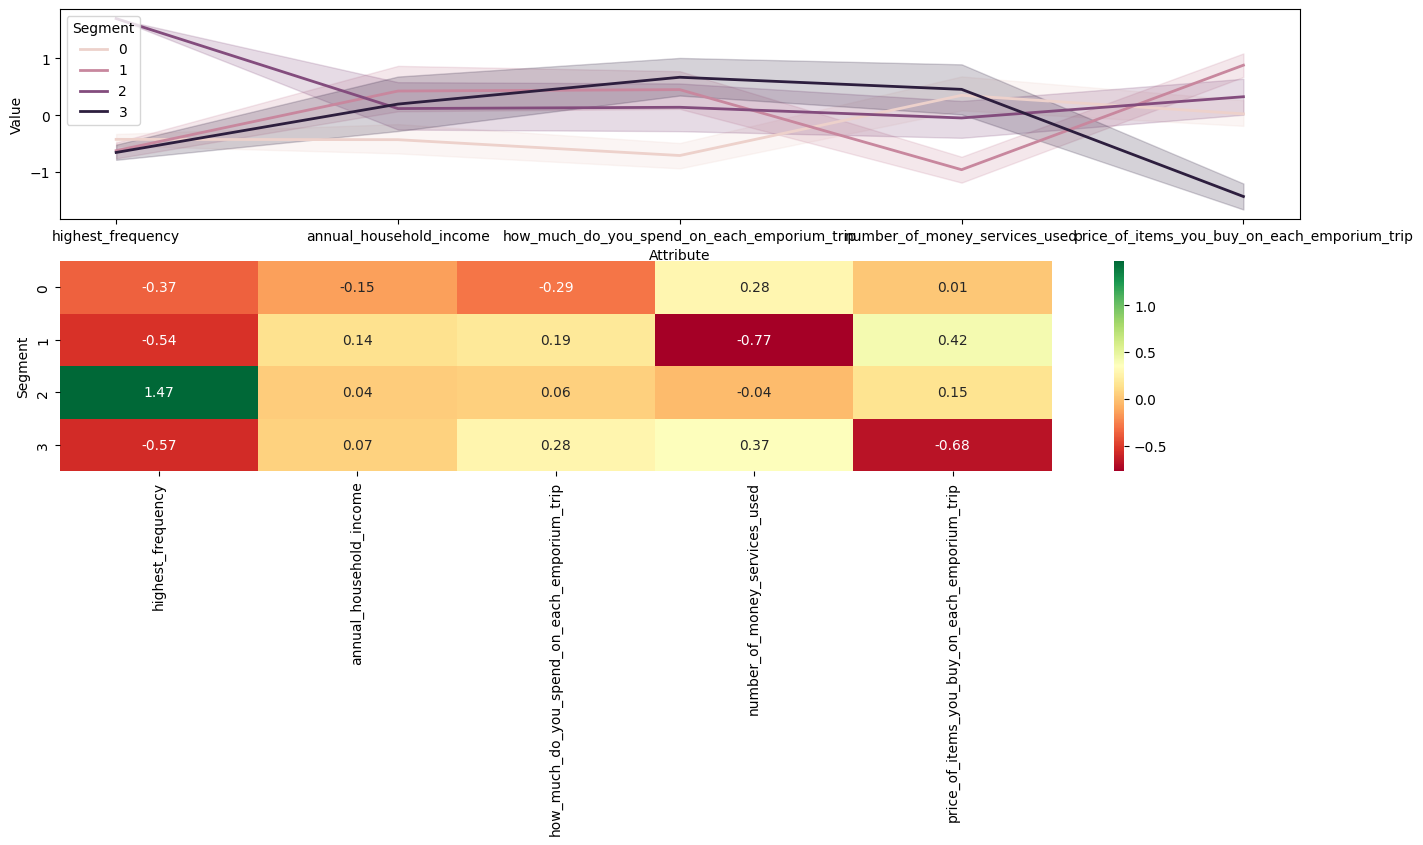

In [39]:
# inspect feature values and importance across segments
behaviour_seg_df, normalized_df, relative_imp_df = kmeans_cust_seg(df_raw=behaviour_seg_df, df_norm=normalized_df,
                                                                   n_clusters=4)

In [40]:
# summary stats
display(behaviour_seg_df.groupby('Segment').median())
display(behaviour_seg_df.groupby('Segment').mean())
display(behaviour_seg_df.groupby('Segment').apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None))

,highest_frequency,annual_household_income,how_much_do_you_spend_on_each_emporium_trip,number_of_money_services_used,price_of_items_you_buy_on_each_emporium_trip
Segment,,,,,
0,12.0,83459.0,43.0,1.0,2.0
1,6.0,113849.0,76.0,0.0,3.0
2,36.0,102613.0,62.0,1.0,2.0
3,6.0,107279.0,82.0,1.0,1.0


,highest_frequency,annual_household_income,how_much_do_you_spend_on_each_emporium_trip,number_of_money_services_used,price_of_items_you_buy_on_each_emporium_trip
Segment,,,,,
0,9.222222,88037.777778,44.333333,1.333333,1.972222
1,6.714286,118086.714286,74.666667,0.238095,2.761905
2,36.000000,107261.583333,66.541667,1.000000,2.250000
3,6.315789,110022.473684,80.368421,1.421053,0.631579


,highest_frequency,annual_household_income,how_much_do_you_spend_on_each_emporium_trip,number_of_money_services_used,price_of_items_you_buy_on_each_emporium_trip,Segment
Segment,,,,,,
0,12.0,39757.0,33.0,1.0,2.0,0.0
1,12.0,57373.0,76.0,0.0,3.0,1.0
2,36.0,44718.0,49.0,1.0,2.0,2.0
3,6.0,49744.0,76.0,1.0,1.0,3.0


In [41]:
# rename cols
behaviour_seg_df.rename(columns={'Segment':'behavioural_segment'}, inplace=True)

##### Segment Interpretation
Segment 0: **Value Seekers**<br>
They are moderate income earners and moderate spenders who shop regularly, use specific financial services, and buy a mix of full price and discounted items. They are target audience for value deals (coupons, clearance sales etc.), budget friendly product lines, and subscription programs.

Segment 1: **Luxury Seekers**<br>
They are high income earners and high spenders who shop occasionally, rarely use financial services, and buy mostly full price items. They are target audience for limited-time offers, exclusive product launches, and high-end products.

Segment 2: **Savvy Spenders**<br>
They are high income earners and moderate spenders who shop regularly, use specific financial services, and buy a mix of full price and discounted items. They are target audience for loyalty programs, and curated collections.

Segment 3: **Bargain Hunters**<br>
They are high income earners and high spenders who shop occasionally, are more willing to use financial services, and prefer to buy discounted items. They are target audience for clearance sales, limited-time discounts, value brands, and bulk purchases

In [42]:
# create persona column with each segment
segment_personas = {0:'Value Seeker', 1:'Luxury Seeker', 2:'Savvy Spender', 3:'Bargain Hunter'}
behaviour_seg_df['behavioural_persona'] = behaviour_seg_df['behavioural_segment'].map(segment_personas)

### Competitor Landscape / Loyalty Segmentation
This segmentation is based on the customers' purchasing behaviour at Emporium relative to other competitor stores.

#### Competitor Landscape Features Engineering
The data used include frequency of customers' visits, how much they spend on average in Walmart, the number of listed competitors they frequent, and how much they spend on average in competitor stores.

In [43]:
# create competitor segmentation df
competitor_seg_df = customers_df.loc[:, ['highest_frequency', 'how_much_do_you_spend_on_each_emporium_trip',
                                        'number_of_competitors', 'how_much_do_you_spend_on_each_trip_to_competitors']]
features_df = competitor_seg_df.copy()

In [44]:
# check for skewness and perform log/cubic/square root transformation if the data is skewed
skewness_validation(features_df=features_df)

highest_frequency:
Skewness=0.9426467010973026

how_much_do_you_spend_on_each_emporium_trip:
Skewness=0.1769879840523104

number_of_competitors:
Skewness=0.851601304777245

how_much_do_you_spend_on_each_trip_to_competitors:
Skewness=0.6980897988614305



#### Competitor Landscape / Loyalty Segments

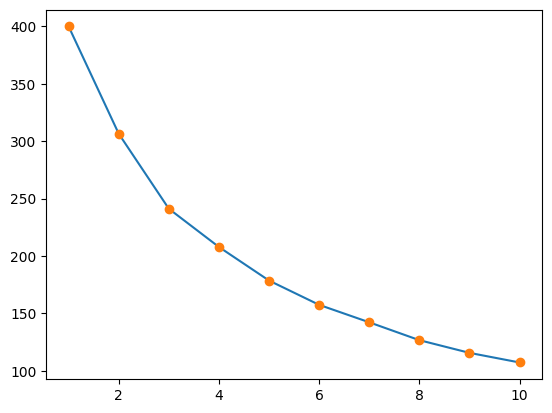

In [45]:
# plot sses
normalized_df = kmeans(df_features=features_df)

In [46]:
# summary stats
normalized_df.describe().round(2)

,highest_frequency,how_much_do_you_spend_on_each_emporium_trip,number_of_competitors,how_much_do_you_spend_on_each_trip_to_competitors
count,100.00,100.00,100.00,100.00
mean,-0.00,-0.00,0.00,0.00
std,1.01,1.01,1.01,1.01
min,-1.00,-2.06,-1.08,-1.65
25%,-0.68,-0.72,-1.08,-0.61
50%,-0.20,0.00,0.07,-0.12
75%,-0.20,0.63,0.64,0.49
max,1.70,2.57,2.93,3.02


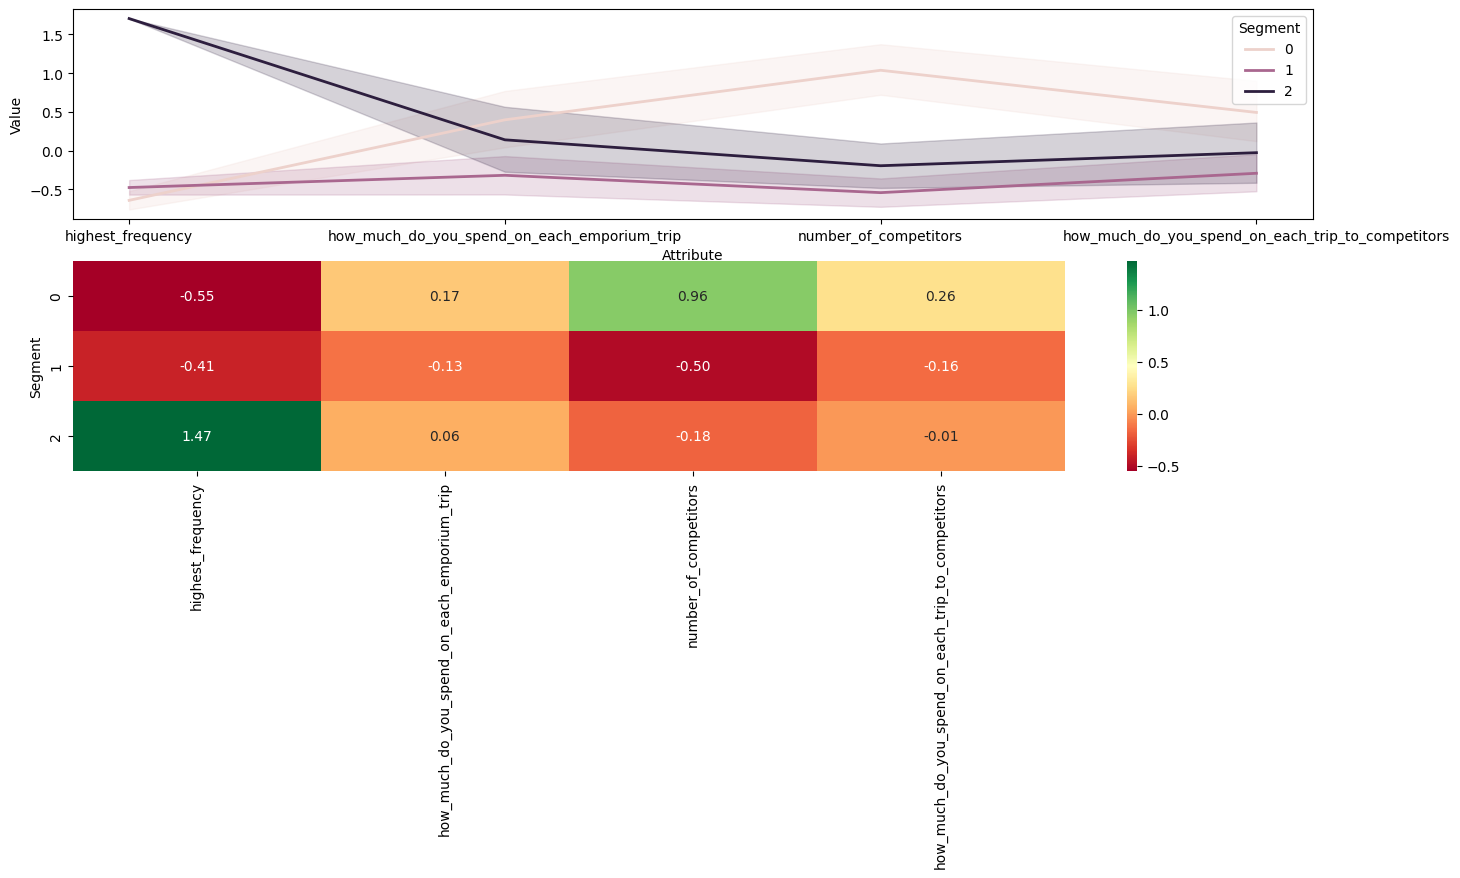

In [47]:
# feature values and importance per segment
competitor_seg_df, normalized_df, relative_imp_df = kmeans_cust_seg(df_raw=competitor_seg_df, df_norm=normalized_df,
                                                                    n_clusters=3)

In [48]:
# summary stats
display(competitor_seg_df.groupby('Segment').median())
display(competitor_seg_df.groupby('Segment').mean())
display(competitor_seg_df.groupby('Segment')\
        .apply(lambda x: x.mode().iloc[0]
               if not x.mode().empty else None))

,highest_frequency,how_much_do_you_spend_on_each_emporium_trip,number_of_competitors,how_much_do_you_spend_on_each_trip_to_competitors
Segment,,,,
0,6.0,76.0,3.0,66.0
1,12.0,50.0,1.0,48.0
2,36.0,62.0,2.0,59.5


,highest_frequency,how_much_do_you_spend_on_each_emporium_trip,number_of_competitors,how_much_do_you_spend_on_each_trip_to_competitors
Segment,,,,
0,6.517241,73.275862,3.689655,74.827586
1,8.595745,54.595745,0.936170,49.957447
2,36.000000,66.541667,1.541667,58.375000


,highest_frequency,how_much_do_you_spend_on_each_emporium_trip,number_of_competitors,how_much_do_you_spend_on_each_trip_to_competitors,Segment
Segment,,,,,
0,6.0,68.0,3.0,66.0,0.0
1,12.0,50.0,0.0,40.0,1.0
2,36.0,49.0,0.0,71.0,2.0


In [49]:
# rename cols
competitor_seg_df.rename(columns={'Segment':'competitor_landscape_segment'}, inplace=True)

##### Segment Interpretation
Segment 0: **Wanderers**<br>
They are high spenders who infrequently shop with Emporium; they visit more major competitors and spend a lot of money there. They are targets for price-matching guarantee campaigns, competitive ads, and strategic product placements.

Segment 1: **Explorers**<br>
They are moderate spenders who shop occasionally with Emporium; they visit fewer competitors and spend low or moderately there. They are targets for special occasion promotions like holiday sales, limited edition products, and personalised product discovery tools.

Segment 2: **Loyalists**<br>
They are moderate to high spenders who shop frequently with Emporium; they visit some competitors and spend moderately there. They are targets for enhanced loyalty programs, exclusive discounts, early access to promotions, and community engagement.

In [50]:
# create persona column with each segment
segment_personas = {0:'Wanderer', 1:'Explorer', 2:'Loyalist'}
competitor_seg_df['competitor_landscape_persona'] = competitor_seg_df['competitor_landscape_segment']\
    .map(segment_personas)

### Product Preference Segmentation
This segmentation is based on the customers' purchase frequency for the different product categories.

#### Product Features Engineering
The data used include frequency of customers' purchase of the different product categories.

In [51]:
# create product pref df
product_pref_df = customers_df.loc[:, [col for col in customers_df.columns if 'numeric_how_often' in col]]
features_df = product_pref_df.copy()

In [52]:
# check for skewness and perform log/cubic/square root transformation if the data is skewed
skewness_validation(features_df)

numeric_how_often_you_shopped_groceries_in_the_past_three_mnths:
Skewness=0.9857507718590154

numeric_how_often_you_shopped_clothing_shoes_accessories_in_the_past_three_mnths:
Skewness=5.838999202305744

Cubic transformation performed on numeric_how_often_you_shopped_clothing_shoes_accessories_in_the_past_three_mnths
New skewness value is -0.29317619648744775

numeric_how_often_you_shopped_home_furniture_appliances_in_the_past_three_mnths:
Skewness=0.24721864822571457

numeric_how_often_you_shopped_health_wellness_beauty_in_the_past_three_mnths:
Skewness=8.461139264348759

Cubic transformation performed on numeric_how_often_you_shopped_health_wellness_beauty_in_the_past_three_mnths
New skewness value is -0.10575983407437818



c:\Users\iolowoye\Anaconda3\envs\streamlit\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\iolowoye\Anaconda3\envs\streamlit\lib\site-packages\pandas\core\nanops.py:1248: RuntimeWarning: invalid value encountered in subtract
  adjusted = values - mean


#### Product Segments

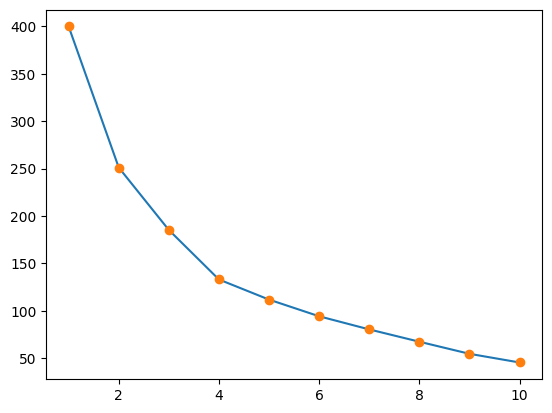

In [53]:
# plot sses
normalized_df = kmeans(df_features=features_df)

In [54]:
# summary stats
normalized_df.describe().round(2)

,numeric_how_often_you_shopped_groceries_in_the_past_three_mnths,numeric_how_often_you_shopped_clothing_shoes_accessories_in_the_past_three_mnths,numeric_how_often_you_shopped_home_furniture_appliances_in_the_past_three_mnths,numeric_how_often_you_shopped_health_wellness_beauty_in_the_past_three_mnths
count,100.00,100.00,100.00,100.00
mean,0.00,-0.00,0.00,0.00
std,1.01,1.01,1.01,1.01
min,-0.97,-2.24,-1.17,-1.32
25%,-0.71,-0.02,-1.17,-1.32
50%,-0.17,-0.02,0.43,0.57
75%,-0.17,0.30,0.43,0.57
max,1.75,3.59,3.63,3.64


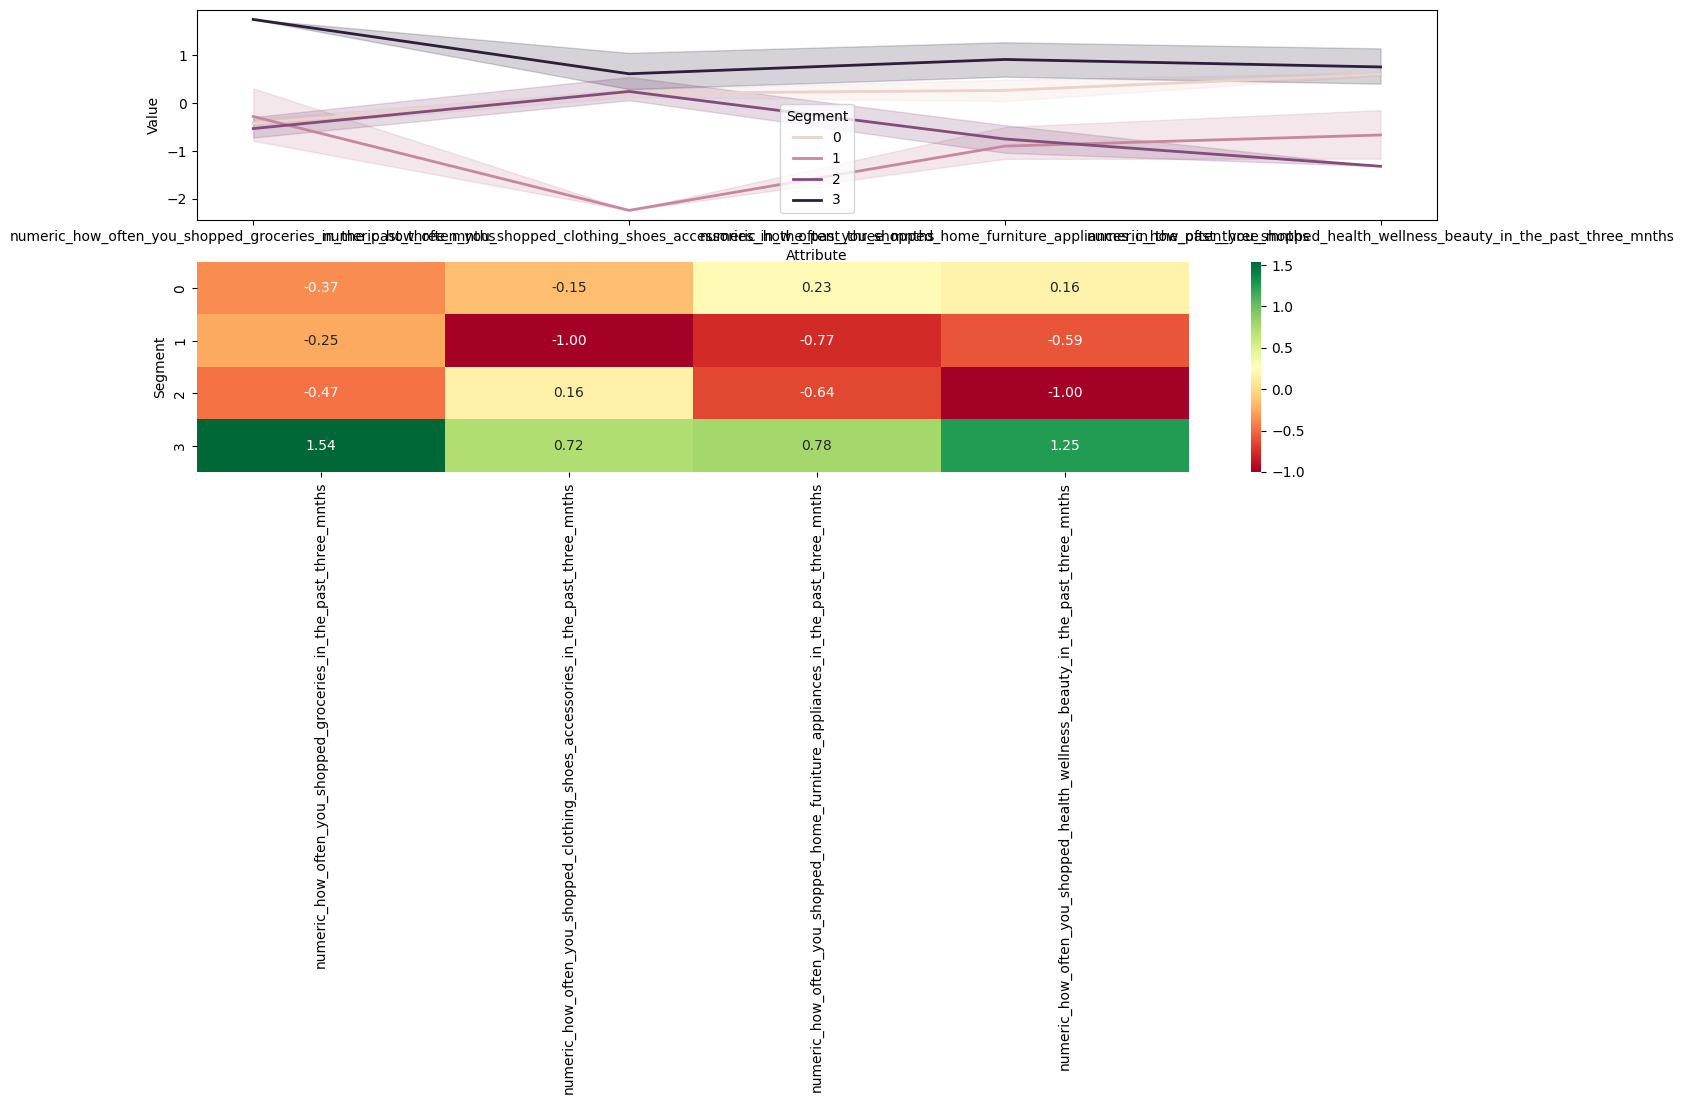

In [55]:
# feature value and importance
product_pref_df, normalized_df, relative_imp_df = kmeans_cust_seg(df_raw=product_pref_df, df_norm=normalized_df,
                                                                  n_clusters=4)

In [56]:
# summary stats
display(product_pref_df.groupby('Segment').median())
display(product_pref_df.groupby('Segment').mean())
display(product_pref_df.groupby('Segment').apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None))

,numeric_how_often_you_shopped_groceries_in_the_past_three_mnths,numeric_how_often_you_shopped_clothing_shoes_accessories_in_the_past_three_mnths,numeric_how_often_you_shopped_home_furniture_appliances_in_the_past_three_mnths,numeric_how_often_you_shopped_health_wellness_beauty_in_the_past_three_mnths
Segment,,,,
0,12.0,3.0,2.0,2.0
1,4.5,0.0,0.0,0.0
2,6.0,2.0,0.0,0.0
3,36.0,3.0,3.0,2.0


,numeric_how_often_you_shopped_groceries_in_the_past_three_mnths,numeric_how_often_you_shopped_clothing_shoes_accessories_in_the_past_three_mnths,numeric_how_often_you_shopped_home_furniture_appliances_in_the_past_three_mnths,numeric_how_often_you_shopped_health_wellness_beauty_in_the_past_three_mnths
Segment,,,,
0,8.883721,2.744186,1.790698,2.116279
1,10.666667,0.000000,0.333333,0.750000
2,7.520000,3.720000,0.520000,0.000000
3,36.000000,5.550000,2.600000,4.100000


,numeric_how_often_you_shopped_groceries_in_the_past_three_mnths,numeric_how_often_you_shopped_clothing_shoes_accessories_in_the_past_three_mnths,numeric_how_often_you_shopped_home_furniture_appliances_in_the_past_three_mnths,numeric_how_often_you_shopped_health_wellness_beauty_in_the_past_three_mnths,Segment
Segment,,,,,
0,12.0,2.0,2.0,2.0,0.0
1,2.0,0.0,0.0,0.0,1.0
2,12.0,2.0,0.0,0.0,2.0
3,36.0,3.0,3.0,2.0,3.0


In [57]:
# rename cols
product_pref_df.rename(columns={'Segment':'product_segment'}, inplace=True)

##### Segment Interpretation
Segment 0: **Category Hoppers**<br>
They shop occasionally across all product categories, albeit with emphasis on groceries. They are targets for bundled product offers, and rewards for diversified purchases.

Segment 1: **Pantry Planners**<br>
They shop occasionally specifically for groceries. They are targets for grocery specific promotions, new grocery product launches, and subscriptions to freemium expert advice on groceries.

Segment 2: **Style & Sustenance Seekers**<br>
They shop occasionally for groceries and some clothing/shoes/accessories items. They are targets for promotions and subscriptions to freemium tutorials on both categories.

Segment 3: **Universal Shoppers**<br>
They shop across all product categories, primarily groceries, and also explore interests in home/furniture/appliances items. They are targets for bundled product offers, rewards for diversified purchases, cross-category discounts, and exclusive early access to new home category arrivals.

In [58]:
# create persona column with each segment
segment_personas = {0:'Category Hopper', 1:'Pantry Planner', 2:'Style & Sustenance Seeker',
                    3:'Universal Shopper'}
product_pref_df['product_persona'] = product_pref_df['product_segment'].map(segment_personas)

### Channel Preference Segmentation
This segmentation is based on the customers' preferred shopping channels, either in-store, with the website, or via the mobile app.

#### Channel Features Engineering
The data used include frequency of customers' purchase of the different product categories.

In [59]:
# create channel preference df
channel_pref_df = customers_df.loc[:, [col for col in customers_df.columns if 'you_prefer_shopping' in col]]\
    .fillna(0).map(lambda x:1 if x!=0 else 0)
features_df = channel_pref_df.copy()

#### Channel Segments

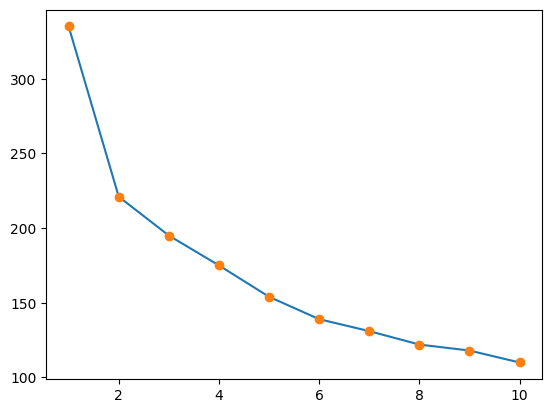

In [60]:
# plot sses
kmodes(features_df)

In [61]:
# create segments
channel_pref_df = kmodes_cust_seg(channel_pref_df, 4)
# summary stats
display(channel_pref_df.groupby('Segment').median())
display(channel_pref_df.groupby('Segment').mean())

,you_prefer_shopping_groceries_instore,you_prefer_shopping_groceries_website,you_prefer_shopping_groceries_with_the_app,you_prefer_shopping_clothing_shoes_accessories_instore,you_prefer_shopping_clothing_shoes_accessories_website,you_prefer_shopping_clothing_shoes_accessories_with_the_app,you_prefer_shopping_home_furniture_appliances_instore,you_prefer_shopping_home_furniture_appliances_website,you_prefer_shopping_home_furniture_appliances_with_the_app,you_prefer_shopping_health_wellness_beauty_instore,you_prefer_shopping_health_wellness_beauty_website,you_prefer_shopping_health_wellness_beauty_with_the_app
Segment,,,,,,,,,,,,
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


,you_prefer_shopping_groceries_instore,you_prefer_shopping_groceries_website,you_prefer_shopping_groceries_with_the_app,you_prefer_shopping_clothing_shoes_accessories_instore,you_prefer_shopping_clothing_shoes_accessories_website,you_prefer_shopping_clothing_shoes_accessories_with_the_app,you_prefer_shopping_home_furniture_appliances_instore,you_prefer_shopping_home_furniture_appliances_website,you_prefer_shopping_home_furniture_appliances_with_the_app,you_prefer_shopping_health_wellness_beauty_instore,you_prefer_shopping_health_wellness_beauty_website,you_prefer_shopping_health_wellness_beauty_with_the_app
Segment,,,,,,,,,,,,
0,0.166667,0.777778,0.222222,0.111111,0.611111,0.111111,0.222222,0.166667,0.055556,0.166667,0.333333,0.055556
1,1.000000,0.000000,0.205128,0.205128,0.512821,0.128205,0.153846,0.282051,0.051282,0.179487,0.153846,0.051282
2,1.000000,0.857143,0.857143,1.000000,0.571429,0.714286,0.857143,0.714286,0.714286,1.000000,0.714286,0.714286
3,0.777778,0.222222,0.277778,1.000000,0.055556,0.027778,0.916667,0.138889,0.027778,0.888889,0.027778,0.055556


In [62]:
# rename cols
channel_pref_df.rename(columns={'Segment':'channel_segment'}, inplace=True)

##### Segment Interpretation
Segment 0: **Digital Crew**<br>
They prefer to shop most of their product categories either through the website or with the mobile app. They value speed and convenience and are targets for exclusive online deals.

Segment 1: **Click & Brick Crew**<br>
They prefer to shop groceries instore, and other product categories online, primarily through the website.They are targets for online-exclusive deals, and also instore events.

Segment 2: **Omnichannel Crew**<br>
They prefer omnichannel experiences across all product categories and they value seamless integration and convenience. They are targets for cross-channel offers (such as online deals for in-store visits) and rewards for multichannel purchases.

Segment 3: **Brick & Mortar Crew**<br>
They prefer to shop in-store and are targets for in-store events, promotions, and demonstrations.

In [63]:
# create persona column with each segment
segment_personas = {0:'Digital Crew', 1:'Click & Brick Crew', 2:'Omnichannel Crew',
                    3:'Brick & Mortar Crew'}
channel_pref_df['channel_persona'] = channel_pref_df['channel_segment'].map(segment_personas)

### Save Model Results

In [64]:
# concat all segmentation results
seg_results = pd.concat([
    behaviour_seg_df.loc[:, ['behavioural_segment', 'behavioural_persona']],
    competitor_seg_df.loc[:, ['competitor_landscape_segment', 'competitor_landscape_persona']],
    product_pref_df.loc[:, ['product_segment', 'product_persona']],
    channel_pref_df.loc[:, ['channel_segment', 'channel_persona']]
], axis=1, ignore_index=False)

In [65]:
# save model
seg_results.to_csv('segmentation_model_results.csv')